The image dimensions are (4000, 3000, 3)
 & 
The image pixel dtpe is uint8


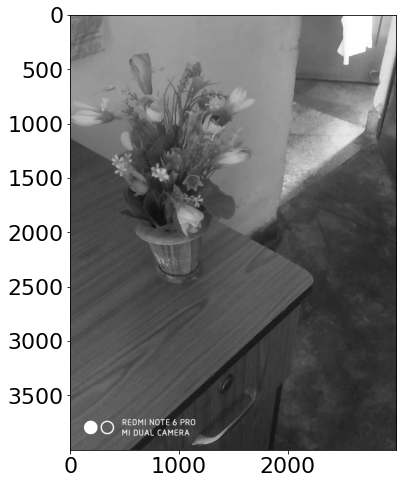

'Bright foreground || Dark background'

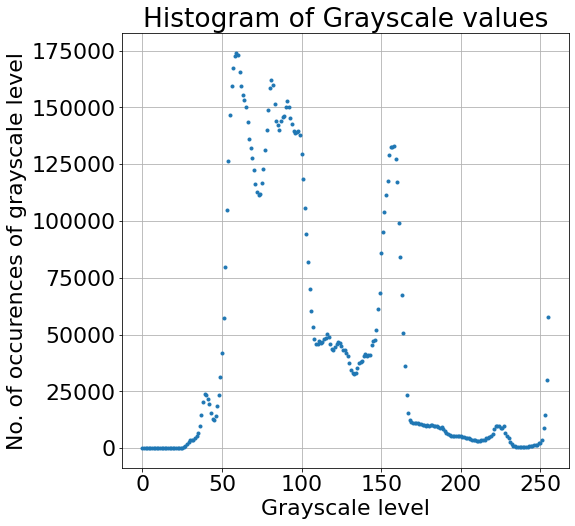

In [90]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

def rgbtogray_AVG(img):
    return np.mean(img,axis=2)
def rgbtogray_weighted(img):
    w_r,w_g,w_b=0.299,0.587,0.114
    imgray = w_r*img[...,0] + w_g*img[...,1] + w_b*img[...,2]
    return imgray

plt.rcParams.update({'font.size': 22})

imBGR = cv2.imread('../Data/FlowerBlur.jpg')
img = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
print(f'The image dimensions are {img.shape}\n & \nThe image pixel dtpe is {img.dtype}')
im_gray=rgbtogray_weighted(img).astype(np.uint8)
'Show grayscale Weighted image'
plt.figure(figsize=(8,8))
plt.imshow(im_gray,cmap='gray')
plt.show()

hist=np.stack([np.count_nonzero(im_gray == i) for i in range(256)])

plt.figure(figsize=(8,8))
plt.grid()
plt.title('Histogram of Grayscale values')
plt.xlabel('Grayscale level')
plt.ylabel('No. of occurences of grayscale level')
plt.plot(np.arange(256),hist,'.')
'Bright foreground || Dark background'

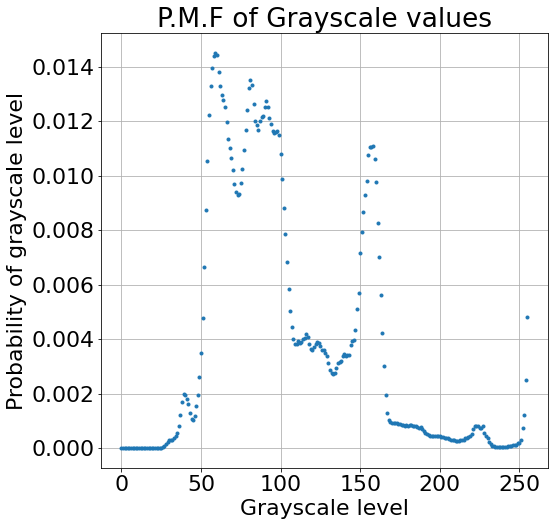

In [91]:
M,N=im_gray.shape
prob=hist/(M*N)
plt.figure(figsize=(8,8))
plt.grid()
plt.title('P.M.F of Grayscale values')
plt.xlabel('Grayscale level')
plt.ylabel('Probability of grayscale level')
plt.plot(np.arange(256),prob,'.')

In [92]:
'''Find threshold values from 
0 to 255 which maximizes within class variance
'''
var_b_ls=[]
for t in range(255):
    g0=np.arange(0,t+1)
    g1=np.arange(t+1,256)
    p0=prob[0:t+1]
    p1=prob[t+1:]

    w0=np.sum(p0)
    w1=np.sum(p1)

    mu0=np.dot(p0,g0)/w0
    mu1=np.dot(p1,g1)/w1

    var_between=w0*w1*(mu1-mu0)**2
    var_b_ls.append(var_between)
var_b_=np.array(var_b_ls)
var_b_standard=np.where(np.isnan(var_b_),-1,var_b_)
var_b_max=np.max(var_b_standard)
thresh=np.argmax(var_b_standard)

C:\Users\aadit\AppData\Local\Temp/ipykernel_14708/1337047299.py:14: RuntimeWarning: invalid value encountered in double_scalars
  mu0=np.dot(p0,g0)/w0


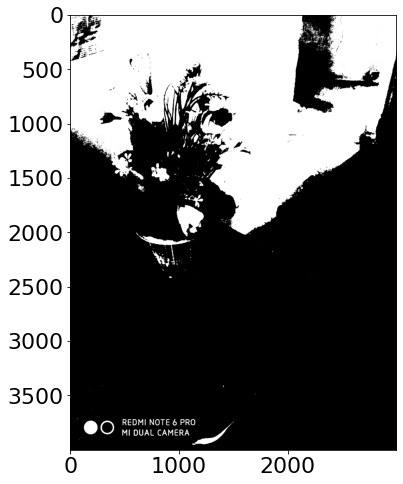

In [93]:
'''Using Otsu's thresholding '''
im_bin=np.where(im_gray>thresh,255,0)
'Show Binary image'
plt.figure(figsize=(8,8))
plt.imshow(im_bin,cmap='gray')
plt.show()